In [90]:
import pandas as pd 
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
data = pd.read_csv('./data/draft_analysis.csv', sep = ';', index_col=False)
data.head(15)

,Customer,Year,Product,Unit,Amount,Buying_Price,Sales_Price
0,MSCH,2023,Socks,2-pack,1200,"1,23",4
1,MSCH,2023,Socks,2-pack,2400,"1,24",5
2,MSCH,2023,Socks,3-pack,1000,"1,2","4,5"
3,MSCH,2023,Trunks,1-pack,4000,"1,67","4,8"
4,MSCH,2023,T-shirt,3-pack,1200,3,14
5,MSCH,2023,Socks,2-pack,1200,"1,32",4
6,MSCH,2023,Socks,2-pack,3000,"1,23",2
7,MSCH,2024,T-shirt,1-pack,4000,3,14
8,MSCH,2024,Trunks,1-pack,1500,"1,87",8
9,MSCH,2024,Socks,3-pack,3000,"1,24",4


In [92]:
data['Buying_Price'] = (
    data['Buying_Price']
    .astype(str)
    .str.replace(',', '.', regex=False)
    .astype(float)
)
data['Sales_Price'] = (
    data['Sales_Price']
    .astype(str)
    .str.replace(',', '.', regex=False)
    .astype(float)
)

In [93]:
data['Year'] = data.Year.astype('Int64')
data['Amount'] = data.Amount.astype('Int64')

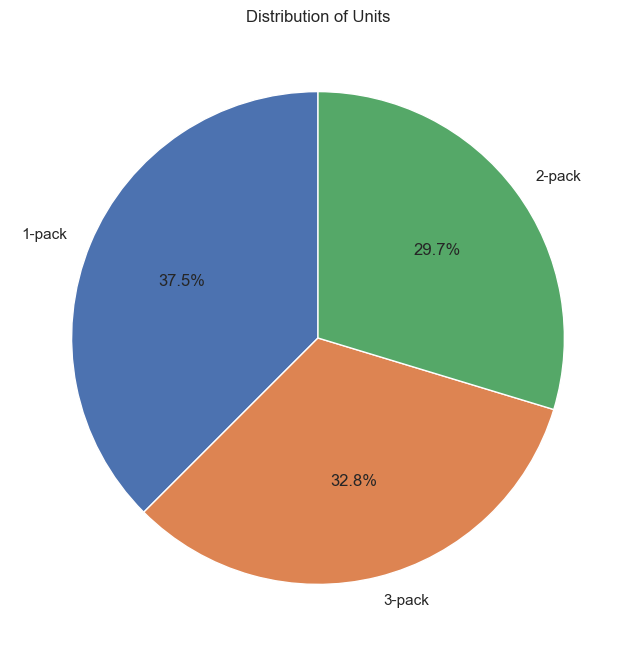

In [94]:
unit_count = data.Unit.value_counts()

plt.figure(figsize=(10,8))
plt.pie(unit_count, labels=unit_count.index,autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Units")
plt.show()

In [95]:
data_per_year = data.groupby(['Year', 'Product'], as_index=False)['Amount'].sum()
data_per_year.head(15)

,Year,Product,Amount
0,2019,Socks,6365
1,2019,T-shirt,6937
2,2019,Trunks,4115
3,2020,Socks,13407
4,2020,T-shirt,4474
5,2020,Trunks,2598
6,2021,Socks,4982
7,2021,T-shirt,10719
8,2021,Trunks,4677
9,2022,T-shirt,15988


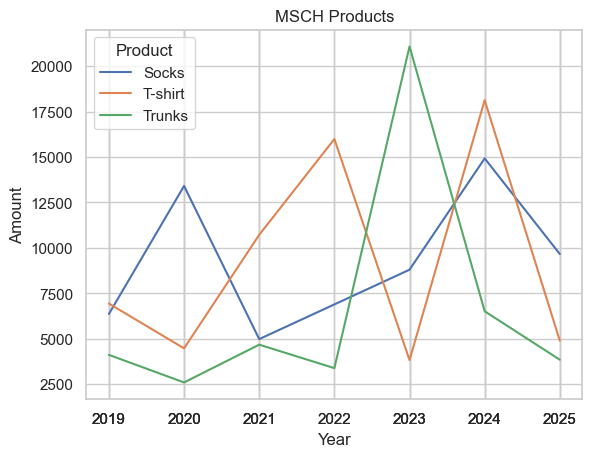

In [96]:
sns.lineplot(data_per_year, x=data_per_year.Year, y=data_per_year.Amount, hue=data_per_year.Product)
plt.xticks(data_per_year['Year'])
plt.title('MSCH Products')
plt.show()

In [97]:
price = (
    data.groupby(['Year','Product','Unit'])
    .apply(lambda g: np.average(g['Buying_Price'], weights=g['Amount']))
    .reset_index(name='Weighted_Buying_Price').round(2)
)
price

/var/folders/bj/p18ygv1s6wbg6865d00fd5h80000gn/T/ipykernel_1514/1025852473.py:3: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,Year,Product,Unit,Weighted_Buying_Price
0,2019,Socks,2-pack,2.59
1,2019,Socks,3-pack,2.07
2,2019,T-shirt,1-pack,1.14
3,2019,T-shirt,3-pack,1.32
4,2019,Trunks,1-pack,3.03
5,2020,Socks,1-pack,1.34
6,2020,Socks,2-pack,2.42
7,2020,T-shirt,2-pack,1.70
8,2020,T-shirt,3-pack,3.11
9,2020,Trunks,2-pack,3.49


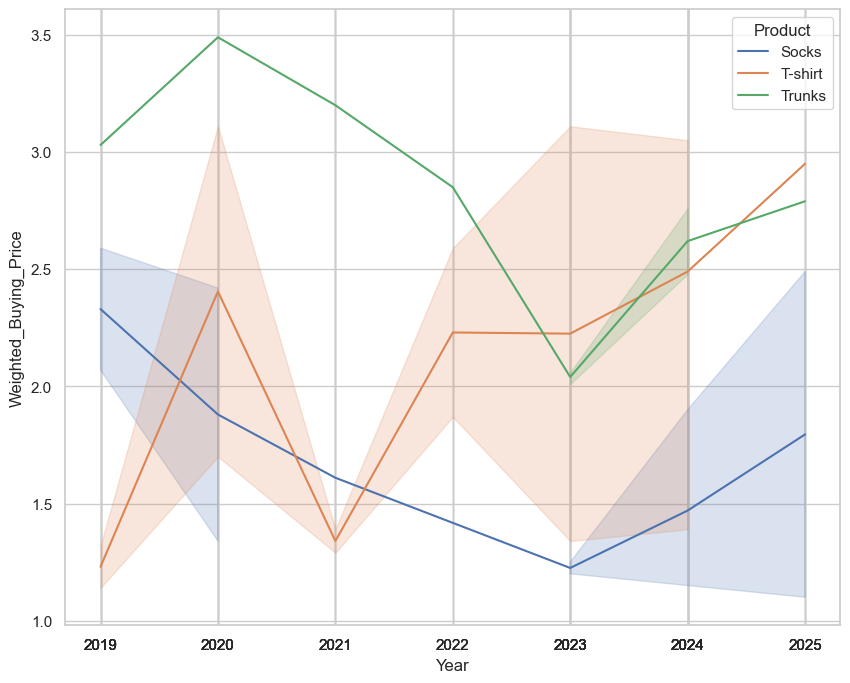

In [98]:
plt.figure(figsize=(10,8))
sns.lineplot(price, x=price.Year, y=price.Weighted_Buying_Price, hue=price.Product)
plt.xticks(price.Year)
plt.show()

In [99]:
# ---------- CLEAN DATA ----------
df = data.copy()
# convert decimals with commas -> dots
for col in ["Buying_Price", "Sales_Price"]:
    df[col] = (
        df[col].astype(str).str.replace(",", ".", regex=False)
        .pipe(pd.to_numeric, errors="coerce")
    )
df["Amount"] = pd.to_numeric(df["Amount"], errors="coerce")
df["Year"] = pd.to_numeric(df["Year"], errors="coerce").astype("Int64")

# weighted average helper
def wavg(g, col):
    return np.average(g[col], weights=g["Amount"]) if g["Amount"].notna().any() else np.nan

# ---------- AGGREGATE ----------
agg = (
    df.groupby(["Year", "Product", "Unit"], dropna=False)
        .apply(lambda g: pd.Series({
            "Buying_wavg": wavg(g, "Buying_Price"),
            "Sales_wavg":  wavg(g, "Sales_Price")
        }))
        .reset_index()
        .sort_values(["Product", "Unit", "Year"])
)

# ---------- 1) PRICE TREND ----------
fig_price = go.Figure()

product_units = (
    agg[["Product", "Unit"]]
    .drop_duplicates()
    .sort_values(["Product", "Unit"])
    .to_records(index=False)
)

# traces for each product-unit pair
for prod, unit in product_units:
    sub = agg[(agg["Product"] == prod) & (agg["Unit"] == unit)]
    fig_price.add_trace(go.Scatter(
        x=sub["Year"], y=sub["Buying_wavg"],
        mode="lines+markers",
        name=f"Buying • {prod} • {unit}",
        hovertemplate="Year=%{x}<br>Buying=%{y:.2f}<extra></extra>",
        visible=False
    ))
    fig_price.add_trace(go.Scatter(
        x=sub["Year"], y=sub["Sales_wavg"],
        mode="lines+markers",
        name=f"Sales • {prod} • {unit}",
        hovertemplate="Year=%{x}<br>Sales=%{y:.2f}<extra></extra>",
        visible=False
    ))

# pooled (all data combined)
pooled = (
    df.groupby("Year", dropna=False)
        .apply(lambda g: pd.Series({
            "Buying_wavg": wavg(g, "Buying_Price"),
            "Sales_wavg":  wavg(g, "Sales_Price")
        }))
        .reset_index()
        .sort_values("Year")
)
fig_price.add_trace(go.Scatter(
    x=pooled["Year"], y=pooled["Buying_wavg"],
    mode="lines+markers",
    name="Buying • ALL",
    line=dict(color="blue", width=3),
    visible=True
))
fig_price.add_trace(go.Scatter(
    x=pooled["Year"], y=pooled["Sales_wavg"],
    mode="lines+markers",
    name="Sales • ALL",
    line=dict(color="red", width=3),
    visible=True
))

# dropdown menu
n_traces = len(fig_price.data)
pairs = list(product_units)
buttons = []

# add pooled button
vis_all = [False] * (2*len(pairs)) + [True, True]
buttons.append(dict(
    label="ALL (pooled)",
    method="update",
    args=[{"visible": vis_all},
          {"title": "Weighted Price Trend — ALL (pooled)"}]
))

# add one button per (product, unit)
for i, (prod, unit) in enumerate(pairs):
    vis = [False] * n_traces
    vis[2*i] = True
    vis[2*i + 1] = True
    buttons.append(dict(
        label=f"{prod} | {unit}",
        method="update",
        args=[{"visible": vis},
              {"title": f"Weighted Price Trend — {prod}, {unit}"}]
    ))

fig_price.update_layout(
    title="Weighted Price Trend — ALL (pooled)",
    xaxis_title="Year",
    yaxis_title="Price",
    legend_title="Series",
    updatemenus=[dict(
        type="dropdown",
        x=1.0, xanchor="right",
        y=1.15, yanchor="top",
        buttons=buttons,
        pad=dict(r=10, t=10)
    )],
    margin=dict(t=90),
    template="plotly_white"
)

# ---------- 2) ORDERS TREND ----------
orders = (
    df.groupby("Year", dropna=False)["Amount"].sum(min_count=1)
        .reset_index()
        .sort_values("Year")
        .rename(columns={"Amount": "Total_Amount"})
)
orders["MA3"] = orders["Total_Amount"].rolling(3, min_periods=1).mean()

fig_orders = go.Figure()
fig_orders.add_trace(go.Bar(
    x=orders["Year"], y=orders["Total_Amount"],
    name="Total Orders (Amount)",
    marker_color="lightblue",
    opacity=0.7
))
fig_orders.add_trace(go.Scatter(
    x=orders["Year"], y=orders["MA3"],
    mode="lines+markers",
    name="3-pt Moving Avg",
    line=dict(color="darkblue", width=3)
))
fig_orders.update_layout(
    title="Orders Trend — Total Demand per Year",
    xaxis_title="Year",
    yaxis_title="Total Amount",
    legend_title="Series",
    template="plotly_white"
)

fig_price.show()
fig_orders.show()


/var/folders/bj/p18ygv1s6wbg6865d00fd5h80000gn/T/ipykernel_1514/3129393975.py:19: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/var/folders/bj/p18ygv1s6wbg6865d00fd5h80000gn/T/ipykernel_1514/3129393975.py:58: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [100]:
vol = df.groupby(["Year","Product"], as_index=False)["Amount"].sum()
fig = px.area(vol, x="Year", y="Amount", color="Product",
              title="Total Demand by Product (Stacked Area)",
              markers=True, template="plotly_white")
fig.update_traces(mode="lines+markers", hovertemplate="Year=%{x}<br>%{legendgroup}: %{y:,}")
fig.show()


In [101]:
row_prices = df.loc[df["Sales_Price"].notna()].copy()
fig = px.box(row_prices, x="Product", y="Sales_Price", color="Product",
             points="all", title="Sales Price Distribution by Product",
             template="plotly_white")
fig.show()

In [102]:
lvl = (df.groupby(["Year","Product","Unit"], as_index=False)
         .agg(Amount=("Amount","sum"),
              Sales_Price=("Sales_Price","mean")))
fig = px.scatter(lvl, x="Sales_Price", y="Amount", size="Amount",
                 color="Product", hover_data=["Year","Unit"],
                 title="Price vs Volume (bubble)", template="plotly_white")
fig.show()


In [103]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# ========= 1) PREP & ENRICH =========
df = data.copy()

# przecinki -> kropki, typy liczbowe
for col in ["Buying_Price", "Sales_Price"]:
    df[col] = (df[col].astype(str).str.replace(",", ".", regex=False)
               .pipe(pd.to_numeric, errors="coerce"))
df["Amount"] = pd.to_numeric(df["Amount"], errors="coerce")
df["Year"]   = pd.to_numeric(df["Year"], errors="coerce")

# helper: średnia ważona wg Amount
def wavg(g, col):
    w = g["Amount"]; x = g[col]
    m = w.notna() & x.notna()
    return np.average(x[m], weights=w[m]) if m.any() else np.nan

def series_for(d, product=None, unit=None):
    """Zwraca dane zgrupowane rocznie dla ALL / (Product[,Unit])"""
    q = d.copy()
    if product is not None:
        q = q[q["Product"].eq(product)]
    if unit is not None:
        q = q[q["Unit"].eq(unit)]

    out = (q.groupby("Year", dropna=True)
             .apply(lambda g: pd.Series({
                 "Buying_wavg": wavg(g,"Buying_Price"),
                 "Sales_wavg":  wavg(g,"Sales_Price"),
                 "Amount": g["Amount"].sum()
             }))
             .reset_index()
             .sort_values("Year"))

    out["MA3"] = out["Amount"].rolling(3, min_periods=1).mean()
    return out

# ========= 2) DANE DO PRZYCISKÓW =========
# ALL (pooled) – domyślny widok
base = series_for(df, None, None)

# lista par Product|Unit do wyboru
pairs = (df[["Product","Unit"]].dropna().drop_duplicates()
         .sort_values(["Product","Unit"])).to_records(index=False)

# ========= 3) FIGURA (2 wiersze, wspólna oś X) =========
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    row_heights=[0.6, 0.4], vertical_spacing=0.08)

# --- GÓRA: ceny (Buying & Sales) + wypełnienie marży ---
fig.add_trace(go.Scatter(
    x=base["Year"], y=base["Buying_wavg"],
    mode="lines+markers", name="Buying (wavg)"
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=base["Year"], y=base["Sales_wavg"],
    mode="lines+markers", name="Sales (wavg)",
    fill="tonexty"  # wypełnienie obszaru między Sales a Buying = "margin band"
), row=1, col=1)

# --- DÓŁ: wolumen (Amount) + MA(3) ---
fig.add_trace(go.Bar(
    x=base["Year"], y=base["Amount"],
    name="Amount", opacity=0.35
), row=2, col=1)

fig.add_trace(go.Scatter(
    x=base["Year"], y=base["MA3"],
    mode="lines+markers", name="Amount MA(3)"
), row=2, col=1)

# ========= 4) DROPDOWN (ALL + każda para Product|Unit) =========
def button_payload(s, title):
    # aktualizacja X/Y dla 4 śladów w ustalonej kolejności
    return [
        {"x": [s["Year"], s["Year"], s["Year"], s["Year"]],
         "y": [s["Buying_wavg"], s["Sales_wavg"], s["Amount"], s["MA3"]]},
        {"title": title}
    ]

buttons = []
# ALL
buttons.append(dict(
    label="ALL (pooled)",
    method="update",
    args=button_payload(base, "Price–Margin & Demand Panel — ALL (pooled)")
))
# każda para Product | Unit
for prod, unit in pairs:
    s = series_for(df, prod, unit)
    title = f"Price–Margin & Demand Panel — {prod}, {unit}"
    buttons.append(dict(label=f"{prod} | {unit}",
                        method="update",
                        args=button_payload(s, title)))

fig.update_layout(
    title="Price–Margin & Demand Panel — ALL (pooled)",
    template="plotly_white",
    updatemenus=[dict(
        type="dropdown", direction="down",
        x=1.0, xanchor="right", y=1.18, yanchor="top",
        buttons=buttons, pad=dict(r=10, t=10)
    )],
    legend_title="Series",
    margin=dict(t=90)
)
fig.update_yaxes(title_text="Price", row=1, col=1)
fig.update_yaxes(title_text="Amount", row=2, col=1)
fig.update_xaxes(title_text="Year", row=2, col=1)

fig.show()


/var/folders/bj/p18ygv1s6wbg6865d00fd5h80000gn/T/ipykernel_1514/3148802060.py:31: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/var/folders/bj/p18ygv1s6wbg6865d00fd5h80000gn/T/ipykernel_1514/3148802060.py:31: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/var/folders/bj/p18ygv1s6wbg6865d00fd5h80000gn/T/ipykernel_1514/3148802060.py:31: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This beha

In [104]:
#Profit
data['Profit'] = ((data['Sales_Price'] - data['Buying_Price'])/data['Sales_Price'] * 100).round(2)
data.head()

,Customer,Year,Product,Unit,Amount,Buying_Price,Sales_Price,Profit
0,MSCH,2023,Socks,2-pack,1200,1.23,4.0,69.25
1,MSCH,2023,Socks,2-pack,2400,1.24,5.0,75.20
2,MSCH,2023,Socks,3-pack,1000,1.20,4.5,73.33
3,MSCH,2023,Trunks,1-pack,4000,1.67,4.8,65.21
4,MSCH,2023,T-shirt,3-pack,1200,3.00,14.0,78.57


In [105]:
df = data.copy()

# Clean numeric fields (commas → dots), cast types
for col in ["Buying_Price", "Sales_Price"]:
    df[col] = (df[col].astype(str).str.replace(",", ".", regex=False)
               .pipe(pd.to_numeric, errors="coerce"))
df["Amount"] = pd.to_numeric(df["Amount"], errors="coerce")
df["Year"]   = pd.to_numeric(df["Year"], errors="coerce")

# Business metrics
df["Revenue"] = df["Sales_Price"] * df["Amount"]
df["COGS"]    = df["Buying_Price"] * df["Amount"]
df["Profit"]  = df["Revenue"] - df["COGS"]

# Weighted margin % per Year × Product
agg = (df.groupby(["Year","Product"])
         .apply(lambda g: 100 * g["Profit"].sum() / g["Revenue"].sum()
                if g["Revenue"].sum() > 0 else np.nan)
         .reset_index(name="Margin_pct")
         .sort_values(["Product","Year"]))

# Plot
fig = px.line(agg, x="Year", y="Margin_pct", color="Product",
              markers=True, template="plotly_white",
              title="Margin % by Product over Years (Weighted by Amount)")
fig.update_yaxes(title="Margin (%)")
fig.update_xaxes(dtick=1)
fig.show()


/var/folders/bj/p18ygv1s6wbg6865d00fd5h80000gn/T/ipykernel_1514/4099627308.py:17: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [106]:
df = data.copy()

# Clean
for col in ["Buying_Price", "Sales_Price"]:
    df[col] = (df[col].astype(str).str.replace(",", ".", regex=False)
               .pipe(pd.to_numeric, errors="coerce"))
df["Amount"] = pd.to_numeric(df["Amount"], errors="coerce")
df["Year"]   = pd.to_numeric(df["Year"], errors="coerce")

# Metrics
df["Revenue"] = df["Sales_Price"] * df["Amount"]
df["COGS"]    = df["Buying_Price"] * df["Amount"]
df["Profit"]  = df["Revenue"] - df["COGS"]

# Aggregate by Year × Product
agg = (df.groupby(["Year","Product"], as_index=False)
         .agg(Revenue=("Revenue","sum"),
              COGS=("COGS","sum"),
              Profit=("Profit","sum")))

agg["Margin_pct"] = np.where(agg["Revenue"]>0, 100*agg["Profit"]/agg["Revenue"], np.nan)
products = agg["Product"].dropna().unique().tolist()

# Build figure with dropdown (bars = Profit, line = Margin %)
fig = go.Figure()

# Add one visible product (first) and keep others hidden; dropdown will toggle
for i, p in enumerate(products):
    sub = agg[agg["Product"] == p].sort_values("Year")
    visible = (i == 0)
    fig.add_trace(go.Bar(
        x=sub["Year"], y=sub["Profit"], name=f"Profit — {p}",
        marker_opacity=0.6, visible=visible
    ))
    fig.add_trace(go.Scatter(
        x=sub["Year"], y=sub["Margin_pct"], name=f"Margin % — {p}",
        mode="lines+markers", yaxis="y2", visible=visible
    ))

# Dropdown buttons
buttons = []
for i, p in enumerate(products):
    vis = [False] * (2*len(products))
    vis[2*i] = True       # profit bar for product i
    vis[2*i+1] = True     # margin line for product i
    buttons.append(dict(
        label=p, method="update",
        args=[{"visible": vis},
              {"title": f"Profit & Margin % by Year — {p}"}]
    ))

# Layout with secondary y-axis
fig.update_layout(
    title=f"Profit & Margin % by Year — {products[0]}",
    template="plotly_white",
    barmode="group",
    xaxis=dict(title="Year", dtick=1),
    yaxis=dict(title="Profit"),
    yaxis2=dict(title="Margin (%)", overlaying="y", side="right"),
    updatemenus=[dict(type="dropdown", x=1.0, xanchor="right",
                      y=1.2, yanchor="top", buttons=buttons)]
)
fig.show()
